# 0. 크롤링 순서
1. 브라우저 열기
2. 웹페이지 접속하기
3. 내가 원하는 정보 있는지 확인
   * 정보가 나타나도록 브라우저 조작 : 클릭 / 입력/ 삭제
4. 브라우저가 가진 데이터(html)를 다운받기 : 다운 & 해석
5. 원하는 정보가 있는 **태그** 찾기  --> 정보만 추출/정리    
   5-1. 태그 찾기
        soup.select('태그조건')
            .select('태그명')
                    '.class속성값'
                    '#id속성값'
                    '부모태그조건 > 자식태그조건'
   5-2.
        tag.text : 화면에 보이는 글
        tag['속성명'] : 속성값 가져오기
        
6. 엑셀 저장하기

# 1. Browser 열기

In [1]:
# 크롤링에 필요한 라이브러리 설치하기(최초 1회)
! pip install selenium 
! pip install chromedriver-autoinstaller

In [2]:
import chromedriver_autoinstaller
from selenium import webdriver
from bs4 import BeautifulSoup

chromedriver_autoinstaller.install() # chromedriver 최신버전설치 :: 내가 쓰는 크롬 브라우저의 버전을 맞춰 줌
browser = webdriver.Chrome()    # 브라우저 열기

크롤링 준비 끝!

현재까지 과정 : python > selenium > chromedriver.exe > Chrome

In [4]:
url = 'https://naver.com'
browser.get(url)

'<html lang="ko" data-dark="false" data-useragent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.88 Safari/537.36"><head><script async="" type="text/javascript" src="https://ssl.pstatic.net/tveta/libs/ndpsdk/prod/ndp-core.js"></script> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"> <meta name="robots" content="index,nofollow"> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:ur
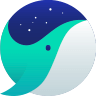
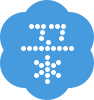

In [5]:
browser.page_source

`.page_source`는 명령어가 아니기 때문에 ()가 없다

html에서 00을 찾아줘라고 하는 라이브러리가 BeatufulSoup이다.

<html data-dark="false" data-useragent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.88 Safari/537.36" lang="ko"><head><script async="" src="https://ssl.pstatic.net/tveta/libs/ndpsdk/prod/ndp-core.js" type="text/javascript"></script> <meta charset="utf-8"/> <title>NAVER</title> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=1190" name="viewport"/> <meta content="NAVER" name="apple-mobile-web-app-title"/> <meta content="index,nofollow" name="robots"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"/> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"/> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta conte
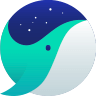
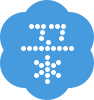

In [6]:
# html 다운받고 해석하기
BeautifulSoup(browser.page_source, "html.parser")# B S  대문자로 써야 함!

In [7]:
# 브라우저 닫기
browser.close()

# 2. 뉴스 크롤링

브라우저 열기

In [8]:
import chromedriver_autoinstaller
from selenium import webdriver
from bs4 import BeautifulSoup

chromedriver_autoinstaller.install() # chromedriver 최신버전설치
browser = webdriver.Chrome()    # 브라우저 열기

브라우저 접속하기

In [10]:
url = 'https://daum.net'
browser.get(url)

https://search.daum.net/search?w=tot&DA=UME&t__nil_searchbox=suggest&sug=&sugo=5&sq=%EB%AA%A8%EB%91%90%EC%9D%98+%EC%97%B0%EA%B5%AC%EC%86%8C&o=3&q=%EB%AA%A8%EB%91%90%EC%9D%98+%EC%97%B0%EA%B5%AC%EC%86%8C

url 구조
- 주소 : naver.com, www.google.com, => 어느 컴퓨터에 들어갈까    
    ?(기준)    
- 파라미터 : 변수=값 형태&변수2=값2&변수3=값3 

%EB%AA%A8%EB%91%90%EC%9D%98+%EC%97%B0%EA%B5%AC%EC%86%8C => 한글을 유니코드로 바꿔준 것, 이것은 사람이 하는 것이 아니고 크롬(브라우저)가 알아서 해줌

In [13]:
word_list = ['모두의연구소', '고양이', '파이썬', '데이터사이언티스트', '주식', '해외주식', '데이터분석']
# word = '모두의연구소'

for word in word_list:
    url = f'https://search.daum.net/search?w=tot&DA=UME&t__nil_searchbox=suggest&sug=&sugo=5&sq=%EB%AA%A8%EB%91%90%EC%9D%98+%EC%97%B0%EA%B5%AC%EC%86%8C&o=3&q={word}'
    print(url)
    browser.get(url)
    # 크롤링 코드...

https://search.daum.net/search?w=tot&DA=UME&t__nil_searchbox=suggest&sug=&sugo=5&sq=%EB%AA%A8%EB%91%90%EC%9D%98+%EC%97%B0%EA%B5%AC%EC%86%8C&o=3&q=모두의연구소
https://search.daum.net/search?w=tot&DA=UME&t__nil_searchbox=suggest&sug=&sugo=5&sq=%EB%AA%A8%EB%91%90%EC%9D%98+%EC%97%B0%EA%B5%AC%EC%86%8C&o=3&q=고양이
https://search.daum.net/search?w=tot&DA=UME&t__nil_searchbox=suggest&sug=&sugo=5&sq=%EB%AA%A8%EB%91%90%EC%9D%98+%EC%97%B0%EA%B5%AC%EC%86%8C&o=3&q=파이썬
https://search.daum.net/search?w=tot&DA=UME&t__nil_searchbox=suggest&sug=&sugo=5&sq=%EB%AA%A8%EB%91%90%EC%9D%98+%EC%97%B0%EA%B5%AC%EC%86%8C&o=3&q=데이터사이언티스트
https://search.daum.net/search?w=tot&DA=UME&t__nil_searchbox=suggest&sug=&sugo=5&sq=%EB%AA%A8%EB%91%90%EC%9D%98+%EC%97%B0%EA%B5%AC%EC%86%8C&o=3&q=주식
https://search.daum.net/search?w=tot&DA=UME&t__nil_searchbox=suggest&sug=&sugo=5&sq=%EB%AA%A8%EB%91%90%EC%9D%98+%EC%97%B0%EA%B5%AC%EC%86%8C&o=3&q=해외주식
https://search.daum.net/search?w=tot&DA=UME&t__nil_searchbox=suggest&sug=&sugo=5&sq=%EB%AA%

크롤링 실습 페이지 - 다음뉴스

In [14]:
url = 'https://news.v.daum.net/v/20160310190303578'
browser.get(url)  # 페이지 접속하기

20160310190303578 이것이 뉴스의 id로 추청

뉴스 제목 찾기

'<html lang="ko"><head data-cloud-area="head"> \n  <meta charset="utf-8"> \n  <meta http-equiv="X-UA-Compatible" content="IE=edge"> \n  <style>\n            @import url(\'//t1.daumcdn.net/harmony_static/cloud/page/ad23f0c9e6dfe91eebd21c5a9bf5fb189c454f1c1648095650663.css\');\n            @import url(\'//t1.daumcdn.net/harmony_static/cloud/2022/03/24/common.ad2410f730e5fb126f3d.css\')\n        </style> \n  <style>\n            /* 다음 카페 소셜 쉐어 임시 비활성화 */\n            .list_sns li:nth-child(6) {\n                display: none;\n            }\n        </style> \n  <meta property="mccp:docId" content="JDxuFRaEbq"> \n  <meta property="og:site_name" content="다음뉴스"> \n  <meta property="og:title" content="이세돌 &quot;알파고의 완승, 완벽한 대국 펼쳤다&quot;"> \n  <meta property="og:regDate" content="20160310190302"> \n  <meta property="og:type" content="article"> \n  <meta property="og:article:author" content="오마이뉴스"> \n  <meta property="og:url" content="https://news.v.daum.net/v/JDxuFRaEbq"> \n  <meta property=
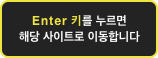

In [15]:
browser.page_source # 페이지를 고정시키는 것

<html lang="ko"><head data-cloud-area="head">
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<style>
            @import url('//t1.daumcdn.net/harmony_static/cloud/page/ad23f0c9e6dfe91eebd21c5a9bf5fb189c454f1c1648095650663.css');
            @import url('//t1.daumcdn.net/harmony_static/cloud/2022/03/24/common.ad2410f730e5fb126f3d.css')
        </style>
<style>
            /* 다음 카페 소셜 쉐어 임시 비활성화 */
            .list_sns li:nth-child(6) {
                display: none;
            }
        </style>
<meta content="JDxuFRaEbq" property="mccp:docId"/>
<meta content="다음뉴스" property="og:site_name"/>
<meta content='이세돌 "알파고의 완승, 완벽한 대국 펼쳤다"' property="og:title"/>
<meta content="20160310190302" property="og:regDate"/>
<meta content="article" property="og:type"/>
<meta content="오마이뉴스" property="og:article:author"/>
<meta content="https://news.v.daum.net/v/JDxuFRaEbq" property="og:url"/>
<meta content="https://img1.daumcdn.net/thumb/S1200x630/?fname=https://t1.dau
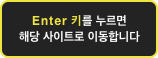

In [17]:
# BeautifulSoup으로 해석하기
soup = BeautifulSoup(browser.page_source, 'html.parser') # 'html.parser' : 영어로 번역할지 불어로 번역할지 지정
soup

내가 원하는 것 찾아줘! => `.select('조건')` 함수/명령어 이용

html 특징 : 
1. <태그명> </태그명>
2. <태그명>글</태그명>
3. <태그명 속성=값>글</태그명>
4. <태그명 속성=값 속성2=값2 속성3=값3>글</태그명>', ex) <태그명 class='값', id='값'>
5. 부모 : 태그명1, 자식 : 태그명2, 태그명3
<태그명1>
    <태그명2>
    </태그명2>
    <태그명3>
        <태그명4>문소정</태그명4>
    </태그명3>
</태그명1>

- soup.select('태그명')
- soup.select('.class속성값')
- soup.select('#id속상값')
- soup.select('부모태그 > 자식태그')

In [21]:
# soup.select('태그명')
# 태그명이 h3인 태그 다 찾아줘!!!
soup.select('h3')

[<h3 class="tit_view" data-translation="true">이세돌 "알파고의 완승, 완벽한 대국 펼쳤다"</h3>,
 <h3 class="tit_cp">오마이뉴스 주요 뉴스</h3>,
 <h3 class="txt_newsview">포토&amp;TV</h3>,
 <h3 class="txt_newsview">이 시각 추천뉴스</h3>]

h3인 모든 것을 출력해 줌

In [20]:
len(soup.select('h3'))

4

In [22]:
# class속성이 tit_view인 태그 다 찾아줘! class를 매번 치기 귀찮으므로 .은 class라고 약속함
soup.select('.tit_view')

[<h3 class="tit_view" data-translation="true">이세돌 "알파고의 완승, 완벽한 대국 펼쳤다"</h3>]

In [23]:
# 태그명이 h3 & class 속성이 tit_view인 태그 다 찾아줘!!
soup.select('h3.tit_view')

[<h3 class="tit_view" data-translation="true">이세돌 "알파고의 완승, 완벽한 대국 펼쳤다"</h3>]

In [24]:
title = soup.select('h3.tit_view')
len(title)

1

In [25]:
title

[<h3 class="tit_view" data-translation="true">이세돌 "알파고의 완승, 완벽한 대국 펼쳤다"</h3>]

In [29]:
title = soup.select('h3.tit_view')[0] # 위와 차이 비교하기!! 
len(title)

1

In [30]:
title

<h3 class="tit_view" data-translation="true">이세돌 "알파고의 완승, 완벽한 대국 펼쳤다"</h3>

In [31]:
# 화면에 보이는 글만 가져와줘!!
title = soup.select('h3.tit_view')[0].text
title

'이세돌 "알파고의 완승, 완벽한 대국 펼쳤다"'

In [32]:
# div 태그 바로 아래 h3.tit_view 찾아줘
# soup.select('부모태그 > 자식태그')
soup.select('.head_view > h3.tit_view')[0].text # class 속성값 head_view인 태그 바로 아래 있는 h3.tit_view

'이세돌 "알파고의 완승, 완벽한 대국 펼쳤다"'

id 속성값으로 찾기

In [33]:
# id 속성값이 cSub인 태가 다 찾아줘
soup.select("#cSub")

[<div data-cloud-area="title" id="cSub">
 <div class="head_view" data-cloud="pc_article_title_and_util"> <em class="info_cp"> <a class="link_cp" href="http://www.ohmynews.com" target="_blank"> <img alt="오마이뉴스" class="thumb_g" src="https://t1.daumcdn.net/media/news/news2016/cp/cp_ohmynews.gif"/> </a> </em>
 <h3 class="tit_view" data-translation="true">이세돌 "알파고의 완승, 완벽한 대국 펼쳤다"</h3> <span class="info_view"> <span class="txt_info">김시연</span> <span class="txt_info">입력 <span class="num_date">2016. 03. 10. 19:03</span></span> <button class="emph_g2 link_cmt" id="alexCounter" style="cursor: pointer;">댓글 <span class="alex-count-area">0</span>개</button> </span>
 <div class="util_view">
 <h4 class="screen_out">기사 도구 모음</h4>
 <div class="btn_util translate_btn"> <button aria-expanded="false" class="btn_set btn_translate #util #translate #set" type="button"><span class="ico_newsview">번역 설정</span></button>
 <div class="wrap_translatelayer">
 <div class="layer_util layer_translate"> <strong class="t

In [34]:
soup.select('#cSub > div > h3.tit_view')

[<h3 class="tit_view" data-translation="true">이세돌 "알파고의 완승, 완벽한 대국 펼쳤다"</h3>]

In [45]:
# 오마이뉴스 찾기

press = soup.select('img')
len(press)

13

In [38]:
press = soup.select('img.thumb_g')
press

[<img alt="Daum" class="thumb_g" height="19" src="//t1.daumcdn.net/media/news/news2016/retina/logo_daum.jpg" width="45"/>,
 <img alt="오마이뉴스" class="thumb_g" src="https://t1.daumcdn.net/media/news/news2016/cp/cp_ohmynews.gif"/>,
 <img alt="" class="thumb_g" src="https://img1.daumcdn.net/thumb/S144x140/?fname=https://t1.daumcdn.net/news/202204/19/kppa/20220419200023806ulag.jpg"/>,
 <img alt="" class="thumb_g" src="https://img1.daumcdn.net/thumb/S144x140/?fname=https://t1.daumcdn.net/news/202204/19/imbc/20220419204008094zlra.jpg"/>,
 <img alt="" class="thumb_g" src="//img1.daumcdn.net/thumb/S570x320/?fname=https://t1.daumcdn.net/news/202204/19/joongang/20220419183859557uhyw.jpg"/>,
 <img alt="" class="thumb_g" src="//img1.daumcdn.net/thumb/S570x320/?fname=https://t1.daumcdn.net/news/202204/19/joongang/20220419120028361bztc.jpg"/>]

In [39]:
press = soup.select('a > img.thumb_g')
press

[<img alt="Daum" class="thumb_g" height="19" src="//t1.daumcdn.net/media/news/news2016/retina/logo_daum.jpg" width="45"/>,
 <img alt="오마이뉴스" class="thumb_g" src="https://t1.daumcdn.net/media/news/news2016/cp/cp_ohmynews.gif"/>]

In [42]:
press = soup.select('a.link_cp > img.thumb_g')[0]
press

<img alt="오마이뉴스" class="thumb_g" src="https://t1.daumcdn.net/media/news/news2016/cp/cp_ohmynews.gif"/>

In [43]:
press.text

''

In [44]:
# tag[속성명] 속성값 가져오기
press = soup.select('a.link_cp > img.thumb_g')[0]['alt']
press

'오마이뉴스'

이미지 가져오기
urllib.request.rulretr

In [46]:
title = soup.select('h3.tit_view')[0].text
press = soup.select('a.link_cp > img.thumb_g')[0]['alt']
print(title, press)

이세돌 "알파고의 완승, 완벽한 대국 펼쳤다" 오마이뉴스


In [47]:
# 브라우저 닫기
browser.close()

# 실습

브라우저 열기 > 접속하기

In [48]:
chromedriver_autoinstaller.install() # chromedriver 최신버전설치 :: 내가 쓰는 크롬 브라우저의 버전을 맞춰 줌
browser = webdriver.Chrome()    # 브라우저 열기

In [49]:
url = 'https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=1'
browser.get(url)

In [52]:
soup = BeautifulSoup(browser.page_source, 'html.parser')
soup

<html lang="ko"><head>
<meta charset="utf-8"/>
<meta content="no" http-equiv="imagetoolbar"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<title>유튜브 랭킹 1 페이지</title>
<link href="/css/default.css?ver=2022022" rel="stylesheet"/>
<link href="/css/bootstrap.css?ver=2022022" rel="stylesheet"/>
<link href="/css/nifty.min.css?ver=2022022" rel="stylesheet"/>
<link href="/css/premium/icon-sets/icons/line-icons/premium-line-icons.min.css?ver=2022022" rel="stylesheet"/>
<link href="/css/themes/type-c/theme-well-red.css?ver=2022022" rel="stylesheet"/>
<link href="https://youtube-rank.com/board/theme/youtube/skin/outlogin/youtuberank/style.css?ver=2022022" rel="stylesheet"/>
<link href="https://youtube-rank.com/board/skin/board/sns_channel/list.skin.css?2022022" rel="stylesheet"/>
<link href="https://unpkg.com/aos@2.3.1/dist/aos.css" rel="stylesheet"/>
<link href="/img/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>
<link href="/favicon.ico" rel="shortcut icon" type="image

부모태그로 찾기

In [62]:
channel_list = soup.select('tr')
len(channel_list) # 채널 갯수가 100개

102

In [63]:
channel_list = soup.select('tbody > tr')
len(channel_list) # 채널 갯수가 100개

101

In [64]:
channel_list = soup.select('table > tbody > tr')
len(channel_list) # 채널 갯수가 100개

101

In [65]:
channel_list = soup.select('form > table > tbody > tr')
len(channel_list) # 채널 갯수가 100개

100

class값으로 찾아보기(쉬어가기)
- 클래스명이 2개 이면 ' '로 띄어 쓴 것을 '.'으로 변경하자

In [66]:
len(soup.select('tr.aos-init aos-animate'))

0

In [67]:
len(soup.select('tr.aos-init.aos-animate'))

5

In [68]:
channel = channel_list[0]
channel

<tr class="aos-init aos-animate" data-aos="fade-up" data-aos-duration="800">
<td class="rank">
                        1                    </td>
<td class="td_img">
<div class="info_img"><a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203&amp;page=1"><img class="lazyload" data-src="https://yt3.ggpht.com/ytc/AKedOLReDErFqqi70z9AXcMzf9Hho9OU1dSciqFYDoGJPQ=s88-c-k-c0x00ffffff-no-rj-mo" height="88" src="https://yt3.ggpht.com/ytc/AKedOLReDErFqqi70z9AXcMzf9Hho9OU1dSciqFYDoGJPQ=s88-c-k-c0x00ffffff-no-rj-mo" width="88"/></a></div>
<p class="info_rank">1</p>
</td>
<td class="subject">
<h1>
<p <a="" class="category" href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;sca=%EC%9D%8C%EC%95%85%2F%EB%8C%84%EC%8A%A4%2F%EA%B0%80%EC%88%98">[음악/댄스/가수]
                                
                                </p>
<a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203&amp;page=1">
								
								BLACKPINK							

In [77]:
# channel 명과 카테고리 찾기
title = channel.select('h1 > a')[0].text.strip() # strip : 공백문자 제거
title

'BLACKPINK'

In [78]:
# 클릭하면 가는 주소 찾기
title = channel.select('h1 > a')[0]['href']
title

'https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&wr_id=3203&page=1'

<a href = '주소'>
<img src='이미지 주소'>

In [81]:
# 카테고리명
category = channel.select('h1 > p')[0].text.strip()
category

'[음악/댄스/가수]'

In [84]:
# 구독자수
subscriber = channel.select('tr > td.subscriber_cnt')[0].text
# len(subscriber)
subscriber

'7360만'

In [86]:
# view 수
view = channel.select('tr > td.view_cnt')[0].text
# len(view)
view

'233억1805만'

In [87]:
# video 수
video = channel.select('tr > td.video_cnt')[0].text
# len(video)
video

'394개'

In [88]:
# 정리
channel = channel_list[1]
title = channel.select('h1 > a')[0].text.strip()
category = channel.select('h1 > p')[0].text.strip()
subscriber = channel.select('tr > td.subscriber_cnt')[0].text
view = channel.select('tr > td.view_cnt')[0].text
video = channel.select('tr > td.video_cnt')[0].text
print(title, category, subscriber, view, video)

BANGTANTV [음악/댄스/가수] 6550만 157억9859만 1,686개


In [89]:
for channel in channel_list :
    title = channel.select('h1 > a')[0].text.strip()
    category = channel.select('h1 > p')[0].text.strip()
    subscriber = channel.select('tr > td.subscriber_cnt')[0].text
    view = channel.select('tr > td.view_cnt')[0].text
    video = channel.select('tr > td.video_cnt')[0].text
    print(title, category, subscriber, view, video)

BLACKPINK [음악/댄스/가수] 7360만 233억1805만 394개
BANGTANTV [음악/댄스/가수] 6550만 157억9859만 1,686개
HYBE LABELS [음악/댄스/가수] 6500만 222억0451만 818개
SMTOWN [음악/댄스/가수] 3030만 243억1848만 3,895개
Boram Tube Vlog [보람튜브 브이로그] [키즈/어린이] 2650만 110억5288만 223개
1MILLION Dance Studio [음악/댄스/가수] 2510만 72억1375만 3,823개
JYP Entertainment [음악/댄스/가수] 2430만 162억1647만 1,469개
1theK (원더케이) [음악/댄스/가수] 2400만 220억6898만 16,286개
Mnet K-POP [음악/댄스/가수] 1940만 147억9967만 27,840개
KBS WORLD TV [TV/방송] 1770만 134억5566만 56,395개
JFlaMusic [음악/댄스/가수] 1750만 35억9418만 282개
Jane ASMR 제인 [음식/요리/레시피] 1640만 61억0702만 1,433개
officialpsy [음악/댄스/가수] 1550만 90억8445만 94개
BIGBANG [음악/댄스/가수] 1470만 71억2521만 776개
TWICE [음악/댄스/가수] 1350만 32억5192만 774개
Hongyu ASMR 홍유 [음식/요리/레시피] 1240만 37억3894만 466개
TheWeekndVEVO [미분류] 1060만 143억8424만 131개
Nao FunFun [키즈/어린이] 1060만 430만 31개
핑크퐁 (인기 동요・동화) [키즈/어린이] 1050만 64억1099만 2,556개
Stone Music Entertainment [음악/댄스/가수] 1040만 86억7804만 8,700개
DuDuPopTOY [키즈/어린이] 1030만 47억0174만 2,082개
Toymong tv 토이몽TV [키즈/어린이] 996만 41억2778만 2,021개
MB

In [91]:
url = 'https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=30'
browser.get(url)
soup = BeautifulSoup(browser.page_source, 'html.parser')
channel_list = soup.select('form > table > tbody > tr')

for channel in channel_list : 
    title = channel.select('h1 > a')[0].text.strip()
    category = channel.select('h1 > p')[0].text.strip()
    subscriber = channel.select('tr > td.subscriber_cnt')[0].text
    view = channel.select('tr > td.view_cnt')[0].text
    video = channel.select('tr > td.video_cnt')[0].text
    print(title, category, subscriber, view, video)

슈돌 - 슈퍼맨이 돌아왔다 [미분류] 16만 7486만 411개
Tooth Breaker [미분류] 16만 6133만 616개
사과 sakwa [미분류] 16만 5883만 166개
해봄 [영화/만화/애니] 16만 3753만 530개
officialLUNAFLY [음악/댄스/가수] 16만 1904만 115개
불도그 [게임] 16만 5047만 574개
2PM Japan Official YouTube Channel [미분류] 16만 4113만 248개
EUNCHIKO은치코 [미분류] 16만 3382만 138개
끼불이_kkibule [미분류] 16만 2억3424만 338개
텃밭주인 [미분류] 16만 2160만 173개
영크릿l Young Cret [미분류] 16만 3914만 105개
쌍튜브 [미분류] 16만 8425만 2,338개
안기효TV [게임] 16만 1억2999만 4,019개
지산카센터 [자동차] 16만 2920만 414개
장난감나라루루 [키즈/어린이] 16만 1억0452만 927개
원창연 WonChangYeon [게임] 16만 1억5196만 3,695개
Kojer [미분류] 16만 8845만 189개
개인팟 [게임] 16만 5260만 1,839개
쌍둥이 엄마 TV [취미/라이프] 16만 4106만 505개
신사장 [미분류] 15만 1억0467만 122개
싱어게인 전체공개 [미분류] 15만 7917만 186개
아이스튜디오 [미분류] 15만 9344만 476개
Esquire [미분류] 15만 7155만 856개
와이키키 스튜디오Ykicky studio [TV/방송] 15만 4120만 215개
배종찬교수의 맛있는 돈이야기 [주식/경제/부동산] 15만 3063만 737개
한조바디 [취미/라이프] 15만 3415만 598개
상남자1 [미분류] 15만 9462만 332개
한국개똥이[캄보디아생활] [미분류] 15만 8226만 335개
라도어메 리얼요리 [미분류] 15만 4106만 690개
삐라 [게임] 15만 8601만 1,767개
배리나Lina bae [TV/방송] 1

In [92]:
import time

In [95]:
for page in range(1, 6):
    url = f'https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page={page}'
    browser.get(url)
    # 법적 분쟁 이슈(디도스, 불법다운 등)를 막기 위해 한번 쉬기(접속, 클릭 후에)
    time.sleep(1) # 1초 쉬기
    
    soup = BeautifulSoup(browser.page_source, 'html.parser')
    channel_list = soup.select('form > table > tbody > tr')

    for channel in channel_list : 
        title = channel.select('h1 > a')[0].text.strip()
        category = channel.select('h1 > p')[0].text.strip()
        subscriber = channel.select('tr > td.subscriber_cnt')[0].text
        view = channel.select('tr > td.view_cnt')[0].text
        video = channel.select('tr > td.video_cnt')[0].text
        print(title, category, subscriber, view, video)

BLACKPINK [음악/댄스/가수] 7360만 233억1805만 394개
BANGTANTV [음악/댄스/가수] 6550만 157억9859만 1,686개
HYBE LABELS [음악/댄스/가수] 6500만 222억0451만 818개
SMTOWN [음악/댄스/가수] 3030만 243억1848만 3,895개
Boram Tube Vlog [보람튜브 브이로그] [키즈/어린이] 2650만 110억5288만 223개
1MILLION Dance Studio [음악/댄스/가수] 2510만 72억1375만 3,823개
JYP Entertainment [음악/댄스/가수] 2430만 162억1647만 1,469개
1theK (원더케이) [음악/댄스/가수] 2400만 220억6898만 16,286개
Mnet K-POP [음악/댄스/가수] 1940만 147억9967만 27,840개
KBS WORLD TV [TV/방송] 1770만 134억5566만 56,395개
JFlaMusic [음악/댄스/가수] 1750만 35억9418만 282개
Jane ASMR 제인 [음식/요리/레시피] 1640만 61억0702만 1,433개
officialpsy [음악/댄스/가수] 1550만 90억8445만 94개
BIGBANG [음악/댄스/가수] 1470만 71억2521만 776개
TWICE [음악/댄스/가수] 1350만 32억5192만 774개
Hongyu ASMR 홍유 [음식/요리/레시피] 1240만 37억3894만 466개
TheWeekndVEVO [미분류] 1060만 143억8424만 131개
Nao FunFun [키즈/어린이] 1060만 430만 31개
핑크퐁 (인기 동요・동화) [키즈/어린이] 1050만 64억1099만 2,556개
Stone Music Entertainment [음악/댄스/가수] 1040만 86억7804만 8,700개
DuDuPopTOY [키즈/어린이] 1030만 47억0174만 2,082개
Toymong tv 토이몽TV [키즈/어린이] 996만 41억2778만 2,021개
MB

꿀키honeykki [음식/요리/레시피] 216만 2억7242만 439개
감스트GAMST [게임] 215만 15억3699만 4,501개
헨리 Henry Lau [음악/댄스/가수] 214만 2억1428만 175개
ITSub잇섭 [IT/기술/컴퓨터] 214만 7억2025만 892개
KQ ENTERTAINMENT [음악/댄스/가수] 213만 8억2236만 334개
4Minute 포미닛(Official YouTube Channel) [음악/댄스/가수] 213만 12억9887만 82개
JTBC News [뉴스/정치/사회] 213만 37억5736만 134,127개
캐릭온 TV [키즈/어린이] 213만 21억7835만 816개
짤툰 [영화/만화/애니] 212만 14억1519만 768개
보길 bogil [TV/방송] 212만 8억5863만 1,148개
JerryPop [음식/요리/레시피] 212만 7억7795만 413개
채널A 캔버스 [뉴스/정치/사회] 211만 25억3229만 28,075개
MBCNEWS [뉴스/정치/사회] 211만 52억2390만 138,643개
슈카월드 [교육/강의] 211만 3억8455만 1,078개
수리노을SuriNoel [애완/반려동물] 211만 7억6642만 1,109개
디바제시카DeevaJessica [교육/강의] 208만 9억0328만 3,059개
아는형님 Knowingbros [TV/방송] 207만 10억4988만 2,395개
올리버쌤 [교육/강의] 207만 6억2164만 680개
도남이먹방Donam [음식/요리/레시피] 206만 6억7748만 885개
레이디버그TV [영화/만화/애니] 206만 7717만 174개
공대생 변승주 DS [BJ/인물/연예인] 206만 15억0196만 1,582개
CheezeFilm [영화/만화/애니] 205만 5억0569만 233개
CL Official Channel [음악/댄스/가수] 203만 2억3438만 67개
퇴경아 약먹자 [TV/방송] 202만 3억4906만 673개
잠뜰 TV [게임] 201만 27억

```python
import requests
requests.get(url)
```

requests를 쓰면 매우 빠르게 크롤링이 가능은 하지만 디도스 등으로 인지해서 크롤링이 막힐 수도 있고 유튜브 댓글 가져오기가 안된다.

# 엑셀에 저장하기

In [96]:
results = [] # 크롤링한 전체 data 담을 공간(리스트)

for page in range(1, 6):
    url = f'https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page={page}'
    browser.get(url)
    # 법적 분쟁 이슈(디도스, 불법다운 등)를 막기 위해 한번 쉬기(접속, 클릭 후에)
    time.sleep(1) # 1초 쉬기
    
    soup = BeautifulSoup(browser.page_source, 'html.parser')
    channel_list = soup.select('form > table > tbody > tr')

    for channel in channel_list : 
        title = channel.select('h1 > a')[0].text.strip()
        category = channel.select('h1 > p')[0].text.strip()
        subscriber = channel.select('tr > td.subscriber_cnt')[0].text
        view = channel.select('tr > td.view_cnt')[0].text
        video = channel.select('tr > td.video_cnt')[0].text
#         print(title, category, subscriber, view, video)
        data = [title, category, subscriber, view, video]
        results.append(data)

In [97]:
import pandas as pd
df = pd.DataFrame(results)
df.columns = ['채널명', '카테고리', '구독자수', '조회수', '영상수']
df.to_excel('./유튜브채널정보.xlsx', index = False)

In [106]:
browser.get('https://naver.com')

In [107]:
# 브라우저에 특정 명령어를 찾을 거야 
word_part = browser.find_elements_by_css_selector('#query')[0]
# word_part.send_keys('파이썬')
word_part.clear()
word_part.send_keys('부동산')
# word_part.send_keys('\n')

<ipython-input-107-38ef868a1fd5>:2: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  word_part = browser.find_elements_by_css_selector('#query')[0]


In [108]:
go_bin = browser.find_elements_by_css_selector('#search_btn')[0]
go_bin.click()

<ipython-input-108-9b4aca2fe575>:1: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  go_bin = browser.find_elements_by_css_selector('#search_btn')[0]


- 이미지 크롤링: https://nouu94.tistory.com/25
- 스크롤로 페이지 넘기기 : https://hello-bryan.tistory.com/194